In [4]:
# Importando todas as bases de dados em csv separadas por ;
import pandas as pd 
vendas_df = pd.read_csv("Contoso - Vendas  - 2017.csv", sep=';')
produtos_df = pd.read_csv("Contoso - Cadastro Produtos.csv", sep=';')
lojas_df = pd.read_csv("Contoso - Lojas.csv", sep = ';')
clientes_df = pd.read_csv("Contoso - Clientes.csv", sep = ';')

In [5]:
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
lojas_df

,ID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


In [6]:
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})

vendas_df

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


# # # Fazendo as análises 

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do Cliente, Length: 38907, dtype: int64


<AxesSubplot:>

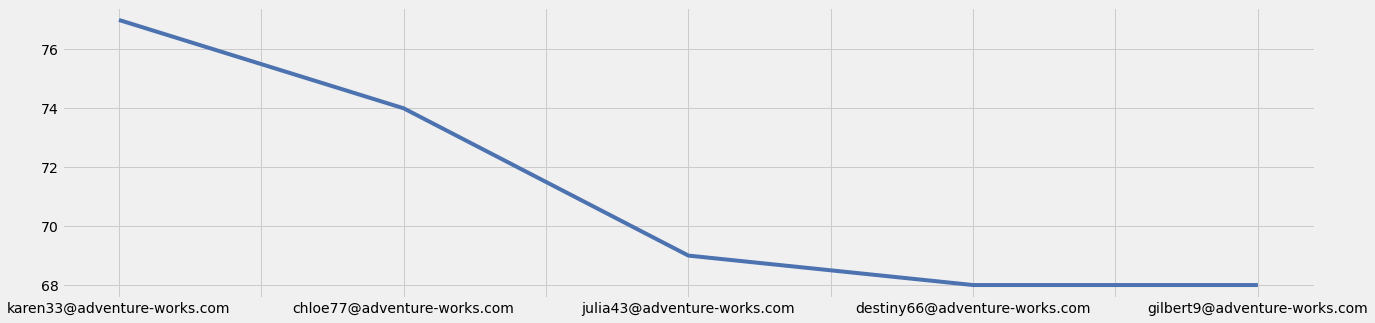

In [17]:
# Qual cliente comprou mais vezes?
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight','seaborn-deep'])
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
print(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(20,5))

In [25]:
#Quanto cada loja vendeu?

vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
vendas_lojas

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


                                     Quantidade Vendida
Nome da Loja                                           
Loja Contoso Catalog                            1029117
Loja Contoso North America Online                701961
Loja Contoso Europe Online                       616845
Loja Contoso Asia Online                         578458
Loja Contoso North America Reseller              520176
...                                                 ...
Loja Contoso Berlin                                 379
Loja Contoso Paterson                               371
Loja Contoso Marseille                              370
Loja Contoso Racine No.2                            253
Loja Contoso Venezia                                234

[306 rows x 1 columns]


<AxesSubplot:xlabel='Nome da Loja'>

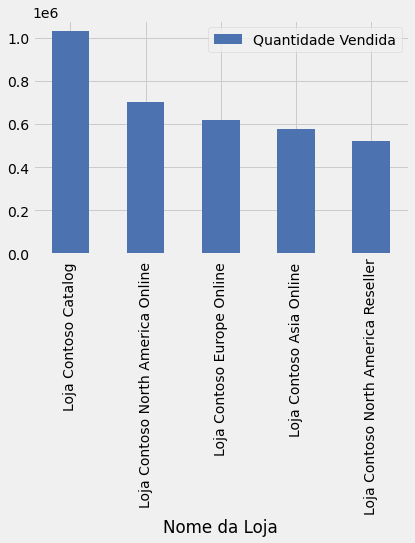

In [28]:
#Ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending = False)
print(vendas_lojas)
vendas_lojas[:5].plot(kind='bar')

In [30]:
#Pegando o maior valor de vendas
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)

Loja Contoso Catalog  1029117


In [31]:
#Pegando o menor valor de vendas
menor_valor = vendas_lojas['Quantidade Vendida'].min()
pior_loja = vendas_lojas['Quantidade Vendida'].idxmin()
print(pior_loja, menor_valor)

Loja Contoso Venezia  234
